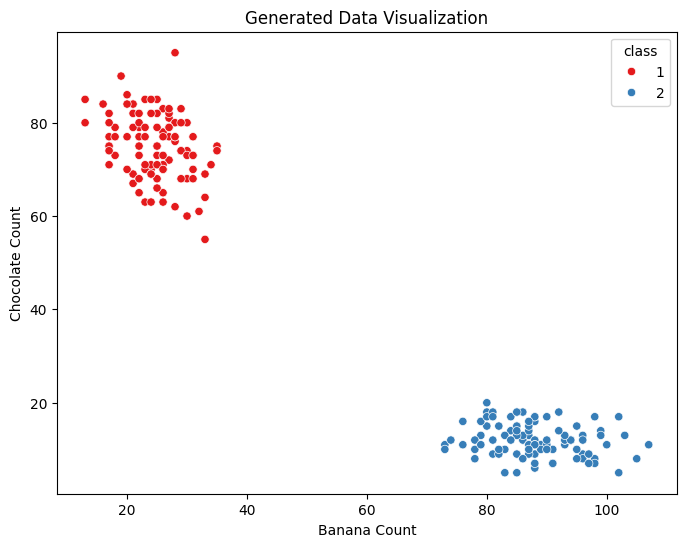

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Step 1: Generate Data

# Set random seed
np.random.seed(123)

# Define priors for the multinomial models
theta_1 = np.random.dirichlet([1, 6], 1).flatten()
theta_2 = np.random.dirichlet([6, 1], 1).flatten()

vocabulary = ["banana", "chocolate"]

# Function to generate text based on theta
def generate_text(w, theta):
    num_words = np.random.binomial(w, 0.5)  # Number of words in the text
    words = np.random.choice(vocabulary, num_words, p=theta, replace=True)
    return " ".join(words)

# Generate texts
n = 100  # Number of texts per type
w = 200  # Number of words per text
text_type_1 = [generate_text(w, theta_1) for _ in range(n)]
text_type_2 = [generate_text(w, theta_2) for _ in range(n)]

# Combine all texts
all_texts = text_type_1 + text_type_2
labels = [1] * n + [2] * n  # True labels for visualization

# Step 2: Convert Texts to Document-Term Matrix (DTM)

vectorizer = CountVectorizer(vocabulary=vocabulary)
dtm = vectorizer.fit_transform(all_texts).toarray()  # DTM as a NumPy array
dtm_df = pd.DataFrame(dtm, columns=vocabulary)

# Step 3: Visualize Data

# Add class labels for plotting
dtm_df['class'] = labels

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dtm_df, x='banana', y='chocolate', hue='class', palette='Set1')
plt.title("Generated Data Visualization")
plt.xlabel("Banana Count")
plt.ylabel("Chocolate Count")
plt.show()


Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids:
 [[88.15 12.02]
 [24.78 74.89]]


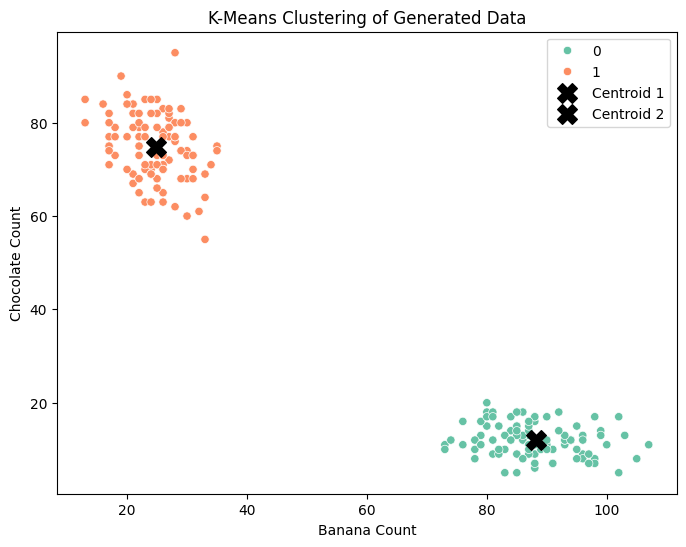

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=123)
dtm_df['cluster'] = kmeans.fit_predict(dtm)

# Extract cluster assignments and centroids
clusters = kmeans.labels_  # Cluster assignments
centroids = kmeans.cluster_centers_  # Centroids of the clusters

print("Cluster Assignments:", clusters)
print("Centroids:\n", centroids)

# Visualize clusters
plt.figure(figsize=(8, 6))

# Scatter plot for the points
sns.scatterplot(data=dtm_df, x='banana', y='chocolate', hue='cluster', palette='Set2', legend='full')

# Add centroids to the plot
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label=f'Centroid {i+1}')

plt.title("K-Means Clustering of Generated Data")
plt.xlabel("Banana Count")
plt.ylabel("Chocolate Count")
plt.legend()
plt.show()


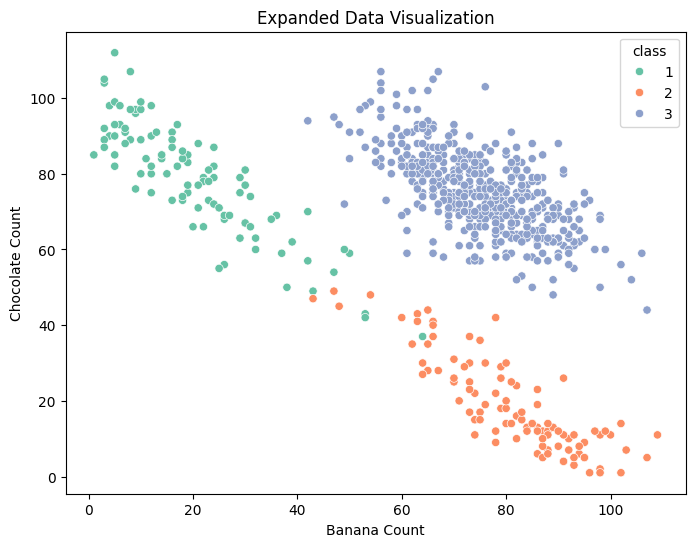

In [3]:
# Add more text data

# Generate additional text for clusters
text_type_1 = [generate_text(w, np.random.dirichlet([2, 8], 1).flatten()) for _ in range(n)]
text_type_2 = [generate_text(w, np.random.dirichlet([8, 2], 1).flatten()) for _ in range(n)]
text_type_3 = [generate_text(w + 100, np.random.dirichlet([50, 50], 1).flatten()) for _ in range(500)]

# Combine all texts
all_texts = text_type_1 + text_type_2 + text_type_3
labels = [1] * n + [2] * n + [3] * 500  # True labels for visualization

# Create a Document-Term Matrix (DTM)
dtm = vectorizer.fit_transform(all_texts).toarray()
dtm_df = pd.DataFrame(dtm, columns=vocabulary)

# Add class labels for plotting
dtm_df['class'] = labels

# Visualize the expanded dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dtm_df, x='banana', y='chocolate', hue='class', palette='Set2', legend='full')
plt.title("Expanded Data Visualization")
plt.xlabel("Banana Count")
plt.ylabel("Chocolate Count")
plt.show()


Cluster Assignments: [2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

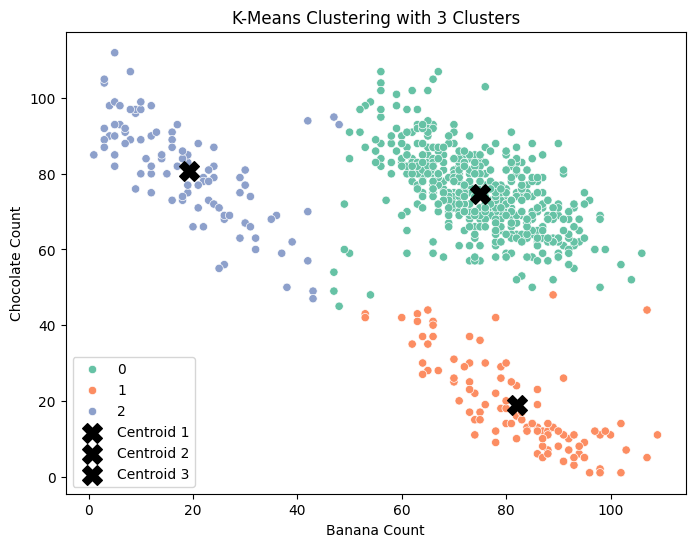

In [4]:
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=123)
dtm_df['cluster'] = kmeans.fit_predict(dtm)

# Extract cluster assignments and centroids
clusters = kmeans.labels_  # Cluster assignments
centroids = kmeans.cluster_centers_  # Centroids of the clusters

# Print clustering results
print("Cluster Assignments:", clusters)
print("Centroids:\n", centroids)

# Visualize clusters
plt.figure(figsize=(8, 6))

# Scatter plot for the points
sns.scatterplot(data=dtm_df, x='banana', y='chocolate', hue='cluster', palette='Set2', legend='full')

# Add centroids to the plot
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label=f'Centroid {i+1}')

plt.title("K-Means Clustering with 3 Clusters")
plt.xlabel("Banana Count")
plt.ylabel("Chocolate Count")
plt.legend()
plt.show()


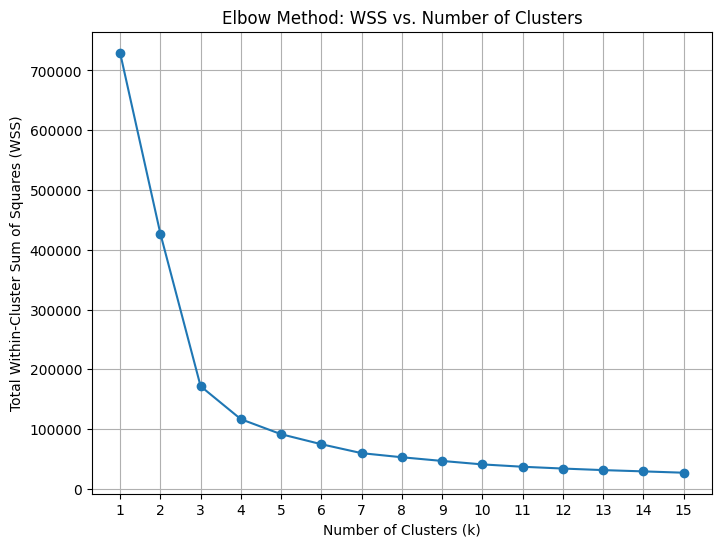

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to compute WSS for k clusters
def compute_wss(data, max_k):
    """
    Compute Within-Cluster Sum of Squares (WSS) for different k values.
    Args:
        data (array): Document-Term Matrix (DTM) or feature matrix.
        max_k (int): Maximum number of clusters to consider.
    Returns:
        list: WSS values for each k.
    """
    wss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=123)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)  # WSS (sum of squared distances to centroids)
    return wss

# Compute WSS for k = 1 to 15
max_k = 15
wss_values = compute_wss(dtm, max_k)

# Plot the WSS values (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wss_values, marker='o')
plt.title("Elbow Method: WSS vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Total Within-Cluster Sum of Squares (WSS)")
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.show()


# Topic Modeling

## Better in r

In [7]:
!pip uninstall numpy -y
!pip install gensim nltk pandas

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)


In [15]:
import gensim
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/petrotolochko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/petrotolochko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/petrotolochko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Load the text data
sotu_text = pd.read_csv('sotu.csv')

# Load the metadata
sotu_meta = pd.read_csv('sotu_meta.csv')

# Combine the datasets
sotu = pd.concat([sotu_text, sotu_meta], axis=1)

# Inspect the data
print(sotu.head())


print(sotu['value'][0])


sotu = sotu[sotu['year'] >= 1901].reset_index(drop=True)

                                               value  X          president  \
0  Fellow-Citizens of the Senate and House of Rep...  1  George Washington   
1  \n\n Fellow-Citizens of the Senate and House o...  2  George Washington   
2  \n\n Fellow-Citizens of the Senate and House o...  3  George Washington   
3  Fellow-Citizens of the Senate and House of Rep...  4  George Washington   
4  \n\n Fellow-Citizens of the Senate and House o...  5  George Washington   

   year years_active        party sotu_type  
0  1790    1789-1793  Nonpartisan    speech  
1  1790    1789-1793  Nonpartisan    speech  
2  1791    1789-1793  Nonpartisan    speech  
3  1792    1789-1793  Nonpartisan    speech  
4  1793    1793-1797  Nonpartisan    speech  
Fellow-Citizens of the Senate and House of Representatives: 

I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs. The recent accession of the important

In [16]:

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens


sotu['tokens'] = sotu['value'].apply(preprocess)

In [18]:
from gensim import corpora

# Create Dictionary
dictionary = corpora.Dictionary(sotu['tokens'])

# Remove rare and common tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus: Term Document Frequency
corpus = [dictionary.doc2bow(tokens) for tokens in sotu['tokens']]

In [24]:
from gensim.models import LdaModel

# Set parameters
num_topics = 5
chunksize = 100
passes = 50
iterations = 100

In [25]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     chunksize=chunksize,
                     alpha='auto',
                     eta='auto',
                     iterations=iterations,
                     num_topics=num_topics,
                     passes=passes,
                     random_state=100)

In [26]:
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

Topic: 0 
Words: 0.012*"tonight" + 0.011*"thats" + 0.007*"college" + 0.007*"dont" + 0.006*"weve" + 0.006*"parent" + 0.005*"thank" + 0.005*"im" + 0.004*"cant" + 0.004*"student"

Topic: 1 
Words: 0.005*"court" + 0.004*"commerce" + 0.004*"army" + 0.004*"navy" + 0.003*"officer" + 0.003*"provision" + 0.003*"corporation" + 0.003*"consideration" + 0.003*"proper" + 0.003*"island"

Topic: 2 
Words: 0.005*"soviet" + 0.005*"objective" + 0.005*"communist" + 0.004*"veteran" + 0.004*"aggression" + 0.003*"recommended" + 0.003*"vietnam" + 0.003*"structure" + 0.003*"surplus" + 0.003*"management"

Topic: 3 
Words: 0.010*"tonight" + 0.008*"terrorist" + 0.007*"iraq" + 0.007*"applause" + 0.006*"thank" + 0.005*"weve" + 0.004*"iraqi" + 0.004*"border" + 0.004*"drug" + 0.004*"afghanistan"

Topic: 4 
Words: 0.007*"oil" + 0.007*"soviet" + 0.006*"rural" + 0.005*"priority" + 0.005*"ensure" + 0.005*"regulatory" + 0.004*"technology" + 0.004*"funding" + 0.004*"management" + 0.004*"developing"



In [27]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)


In [28]:

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


In [29]:
# Prepare the visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization to an HTML file
pyLDAvis.save_html(vis, 'lda_visualization.html')

/Users/petrotolochko/miniconda3/envs/text_as_data/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=82676) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/petrotolochko/miniconda3/envs/text_as_data/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=82676) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/petrotolochko/miniconda3/envs/text_as_data/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=82676) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/petrotolochko/miniconda3/envs/text_as_data/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=82676) is multi-threaded, use of fork() may lead to deadlocks 